## Final Project Submission

Please fill out:
* Student name: *Phil Conrad Kirundi*
* Student pace: *full time*
* Scheduled project review date/time: 
* Instructor name: *Antonny Muiko*
* Blog post URL:


# UBRAN OSCARS MOVIE STUDIO EXPLORATORY DATA ANALYSIS

![alt text](<Screenshot (280).png>)

## Overview

The Urban Oscars Movie Studio is a branch of Gerald & Sons Corp that is looking to create original video content. However, this project is new to the founders and so we have to use the available data sources to get started.

## Business Problem

Due to the fact that the movie business is new to the head of the company, we need to explore and analyze the data sources available in order to translate those findings into actionable insights that the head of the company can use to help decide what type of films to create.

The questions to be answered should be:
1. Which genre has the best rating
2. What should be the allocated budget for producing the films
3. In which months of the year should be considered when releasing a movie to maximize the company's profits

## Data Understanding

Our data sources are from IMDb, Rotten Tomatoes, Box Office Mojo, TheMovieDB and The Numbers. They are in form of csv, tsv, and sql database format. They are stored in a folder named zippedData. We are to read this data so that we can clean it before exploring and visualizing our insights.

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [3]:
# Create connection to IMDb database
import os
import sqlite3
import zipfile

# Extract all zip files into current directory
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    zipObj.extractall(path='./zippedData/')

con = sqlite3.connect('zippedData/im.db')

In [4]:
# import data from the tsv and csv files

movie_info = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', sep="\t")

In [5]:
movie_reviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz',sep="\t", encoding = 'unicode_escape')

In [6]:
movie_gross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')

In [7]:
tmdb_movies = pd.read_csv('./zippedData/tmdb.movies.csv.gz', index_col=0)

In [8]:
movie_budget = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

There is an ERD showing the connection between the tables in the IMDb database.

![alt text](movie_data_erd.jpeg)

We will be more interested in the movie_ratings and the movie_basics tables

In [9]:
movie_ratings = """
                    SELECT * 
                    FROM movie_ratings
                """
rate = pd.read_sql(movie_ratings, con)
rate.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
rate.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [11]:
q1 = """
        SELECT *
        FROM movie_ratings
        JOIN movie_basics
            USING(movie_id)
        ORDER BY averagerating DESC
    """

pd.read_sql(q1, con)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt5390098,10.0,5,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary
1,tt6295832,10.0,5,Requiem voor een Boom,Requiem voor een Boom,2016,48.0,Documentary
2,tt1770682,10.0,5,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary"
3,tt2632430,10.0,5,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary
4,tt8730716,10.0,5,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary
...,...,...,...,...,...,...,...,...
73851,tt7926296,1.0,17,Nakhodka interneta,Nakhodka interneta,2017,162.0,Drama
73852,tt3235258,1.0,510,My First Love,Hatsukoi,2013,82.0,Drama
73853,tt7831076,1.0,96,"Yes, Sir! 7","Yes, Sir! 7",2016,111.0,"Comedy,Drama"
73854,tt3262718,1.0,223,Bye Bye Marrano,Bye Bye Marrano,2013,114.0,Drama


By joining the two tables, we could compare movie genres based on their ratings

## Data Cleaning and Analysis

We then have to clean the data from the other datasets and analyze them.

In [12]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [13]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [14]:
def missing_values_table(movie_gross):
    #total missing values
    mis_val = movie_gross.isnull().sum()
    
    #percentage of missing values
    mis_val_percent = 100 * mis_val / len(movie_gross)
    
    #make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    #rename columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    #sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1]!= 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    
    #print the missing values table
    print ("Your selected dataframe has " + str(movie_gross.shape[1]) + " columns.\n"
           'There are ' + str(mis_val_table_ren_columns.shape[0])+
           " columns that have missing values. ")
    #Return the dataframe with missing information
    return mis_val_table_ren_columns

#display
missing_values = missing_values_table(movie_gross)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 5 columns.
There are 3 columns that have missing values. 


,Missing Values,% of Total Values
foreign_gross,1350,39.900000
domestic_gross,28,0.800000
studio,5,0.100000


Due to the many number of null values in the *foreign_gross* column, we'll drop the rows containing the null values.

In [15]:
movie_gross_new = movie_gross.dropna(subset=['foreign_gross'])

We then change the data type of the *foreign_gross* column data to float.

In [16]:
movie_gross_new['foreign_gross'] = movie_gross_new['foreign_gross'].str.replace(",","").astype(float)

movie_gross_new.head()


C:\Users\PHIL CONRAD\AppData\Local\Temp\ipykernel_21492\2133634836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_gross_new['foreign_gross'] = movie_gross_new['foreign_gross'].str.replace(",","").astype(float)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


We then examine the tmdb data

In [17]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


It has no null values.

In [18]:
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


We want to create a new column that only shows the months.

In [19]:
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'], errors='coerce')

In [20]:
tmdb_movies['release_month'] = tmdb_movies['release_date'].dt.month
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,3
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,5
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,11
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,7


We then group the data according to the release month

In [21]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
 9   release_month      26517 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(4)
memory usage: 2.1+ MB


In [22]:
grouped_tmdb_movies = tmdb_movies.groupby('release_month')
grouped_tmdb_movies.mean(numeric_only=True)

,id,popularity,vote_average,vote_count
release_month,,,,
1,289163.437101,2.180176,5.866762,65.612388
2,284874.361834,3.352600,5.958240,189.337670
3,289719.502909,3.052933,6.042810,168.189942
4,296493.706937,2.784293,6.117537,120.299299
5,293177.639678,3.123663,6.003539,230.502413
6,293923.416898,3.043683,6.067959,203.485688
7,291002.682846,3.585265,5.883710,304.916223
8,295222.210247,3.580677,5.908539,187.911661
9,296616.382067,3.265490,5.955300,167.389134


We examine the *popularity* column

In [23]:
grouped_tmdb_movies['popularity']


We then look for null values in the *movie_budget* dataframe

In [24]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [25]:
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


We then create a function that removes the dollar signs and changes the values from string to a float

In [26]:
def money_string_to_float(df, column_name):
    df[column_name] = df[column_name].replace('[\$,]', '', regex=True).astype(float)
    return df

# Apply the function to the required columns
money_string_to_float(movie_budget, "production_budget")
money_string_to_float(movie_budget, "domestic_gross")
money_string_to_float(movie_budget, "worldwide_gross")

# Display the first few rows of the modified DataFrame
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


We create a new column called *foreign_gross* which will be the difference between *worldwide_gross* and *domestic_gross*

In [27]:
movie_budget['foreign_gross'] = movie_budget['worldwide_gross'] - movie_budget['domestic_gross']

movie_budget['foreign_gross'].sort_values(ascending=False)
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08


We then create a new column *release_month* from the *release_date* column

In [28]:
movie_budget['release_month'] = movie_budget['release_date'].str[0:3]
movie_budget.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.0,0.0,Dec
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,240495.0,192013.0,Apr
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338.0,0.0,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.0,0.0,Sep
5781,82,"Aug 5, 2005",My Date With Drew,1100.0,181041.0,181041.0,0.0,Aug


Due to some rows having 0, we need to drop them.

In [29]:
movie_budget_new = movie_budget.drop(movie_budget[movie_budget['worldwide_gross'] == 0].index)
movie_budget_new.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec


In [30]:
gross_zero = movie_budget_new[movie_budget_new['worldwide_gross'] == 0]
gross_zero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 0 non-null      int64  
 1   release_date       0 non-null      object 
 2   movie              0 non-null      object 
 3   production_budget  0 non-null      float64
 4   domestic_gross     0 non-null      float64
 5   worldwide_gross    0 non-null      float64
 6   foreign_gross      0 non-null      float64
 7   release_month      0 non-null      object 
dtypes: float64(4), int64(1), object(3)
memory usage: 0.0+ bytes


We group the data by *release_month*

In [31]:
movie_budget_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5415 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5415 non-null   int64  
 1   release_date       5415 non-null   object 
 2   movie              5415 non-null   object 
 3   production_budget  5415 non-null   float64
 4   domestic_gross     5415 non-null   float64
 5   worldwide_gross    5415 non-null   float64
 6   foreign_gross      5415 non-null   float64
 7   release_month      5415 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 380.7+ KB


In [32]:
movie_budget_month = movie_budget_new.groupby('release_month')
movie_budget_month.mean(numeric_only=True)

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross
release_month,,,,,
Apr,51.348730,2.479273e+07,2.865379e+07,6.282632e+07,3.417253e+07
Aug,52.344609,2.645859e+07,3.373241e+07,6.394353e+07,3.021112e+07
Dec,50.156200,3.823086e+07,5.530613e+07,1.219991e+08,6.669292e+07
Feb,50.651351,2.919364e+07,3.752039e+07,7.579852e+07,3.827814e+07
Jan,49.591463,2.178006e+07,2.533694e+07,4.926112e+07,2.392418e+07
Jul,49.884434,4.401758e+07,6.301966e+07,1.462830e+08,8.326333e+07
Jun,50.104575,4.484185e+07,6.869623e+07,1.487332e+08,8.003695e+07
Mar,49.822727,3.267950e+07,4.120296e+07,8.613110e+07,4.492814e+07
May,50.358779,4.868485e+07,6.907396e+07,1.680485e+08,9.897459e+07


Even though the data is grouped by *release_month*, it's not in chronological order. So we create a new column with the *release_month* as *month_num*

In [33]:
#create a new column 'month_number'
months_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

# create a loop to add month number
month_num_list=[]
for month in movie_budget_new['release_month']:
    month_num = months_dict[month] 
    month_num_list.append(month_num)
movie_budget_new['month_number'] = month_num_list
movie_budget_new.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May,5
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun,6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec,12


We then group the data by *month_number*

In [34]:
movie_budget_month = movie_budget_new.groupby('month_number')
movie_budget_month.mean(numeric_only=True)

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross
month_number,,,,,
1,49.591463,2.178006e+07,2.533694e+07,4.926112e+07,2.392418e+07
2,50.651351,2.919364e+07,3.752039e+07,7.579852e+07,3.827814e+07
3,49.822727,3.267950e+07,4.120296e+07,8.613110e+07,4.492814e+07
4,51.348730,2.479273e+07,2.865379e+07,6.282632e+07,3.417253e+07
5,50.358779,4.868485e+07,6.907396e+07,1.680485e+08,9.897459e+07
6,50.104575,4.484185e+07,6.869623e+07,1.487332e+08,8.003695e+07
7,49.884434,4.401758e+07,6.301966e+07,1.462830e+08,8.326333e+07
8,52.344609,2.645859e+07,3.373241e+07,6.394353e+07,3.021112e+07
9,48.381974,2.272352e+07,2.449119e+07,4.939912e+07,2.490793e+07


In [35]:
movie_budget_month.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May,5
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun,6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec,12
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.116649e+09,Dec,12
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.369319e+09,Apr,4
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,6.540000e+08,May,5
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,4.269209e+08,Nov,11
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,6.795467e+08,Nov,11


Due to the wide range of years, we have to limit to avoid inflation on our analysis. We, however, have to create a new column *release_year* so that we can filter.

In [36]:
# Slice the date to get release year
movie_budget_new['release_year'] = movie_budget_new['release_date'].str[-4:].astype(int)
movie_budget_new['release_year'].describe()

count    5415.000000
mean     2003.599446
std        12.546965
min      1915.000000
25%      1999.000000
50%      2006.000000
75%      2012.000000
max      2019.000000
Name: release_year, dtype: float64

In [37]:
movie_budget_new = movie_budget_new.sort_values('release_year')
movie_budget_new

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number,release_year
5677,78,"Feb 8, 1915",The Birth of a Nation,110000.0,10000000.0,11000000.0,1000000.0,Feb,2,1915
5614,15,"Dec 24, 1916","20,000 Leagues Under the Sea",200000.0,8000000.0,8000000.0,0.0,Dec,12,1916
5683,84,"Sep 17, 1920",Over the Hill to the Poorhouse,100000.0,3000000.0,3000000.0,0.0,Sep,9,1920
4569,70,"Dec 30, 1925",Ben-Hur: A Tale of the Christ,3900000.0,9000000.0,9000000.0,0.0,Dec,12,1925
5606,7,"Nov 19, 1925",The Big Parade,245000.0,11000000.0,22000000.0,11000000.0,Nov,11,1925
...,...,...,...,...,...,...,...,...,...,...
1176,77,"Apr 12, 2019",Hellboy,50000000.0,21903748.0,40725492.0,18821744.0,Apr,4,2019
3835,36,"Jan 16, 2019",Dragon Ball Super: Broly,8500000.0,30376755.0,122747755.0,92371000.0,Jan,1,2019
496,97,"Apr 5, 2019",Shazam!,85000000.0,139606856.0,362899733.0,223292877.0,Apr,4,2019
3777,78,"Feb 13, 2019",Happy Death Day 2U,9000000.0,28051045.0,64179495.0,36128450.0,Feb,2,2019


We then filter from 1999 to get data for 20 years.

In [38]:
# Filter the year from 1999 to 2019
movie_budget_20 = movie_budget_new[movie_budget_new['release_year'] >= 1999]
movie_budget_20.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number,release_year
2274,75,"Dec 24, 1999",Angela's Ashes,25000000.0,13038660.0,13038660.0,0.0,Dec,12,1999
2074,75,"Oct 1, 1999","Mystery, Alaska",28000000.0,8891623.0,8891623.0,0.0,Oct,10,1999
1464,65,"Aug 20, 1999",Mickey Blue Eyes,40000000.0,33864342.0,53864342.0,20000000.0,Aug,8,1999
5436,37,"Oct 22, 1999",Beyond the Mat,500000.0,2047570.0,2047570.0,0.0,Oct,10,1999
3697,98,"Aug 6, 1999",Illuminata,10000000.0,836641.0,836641.0,0.0,Aug,8,1999


We can now analyze the data with the new columns

In [39]:
# Group by month number
movie_budget_20_grouped = movie_budget_20.groupby('month_number')
movie_budget_20_grouped.mean(numeric_only=True)

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_year
month_number,,,,,,
1,51.150198,2.474520e+07,2.832314e+07,5.910810e+07,3.078495e+07,2009.482213
2,51.136667,3.195229e+07,3.985628e+07,8.440363e+07,4.454735e+07,2009.006667
3,50.346260,3.644596e+07,4.297903e+07,9.320230e+07,5.022327e+07,2008.759003
4,50.082645,2.661579e+07,3.020149e+07,6.854085e+07,3.833935e+07,2008.606061
5,49.370370,5.618259e+07,7.323921e+07,1.849647e+08,1.117254e+08,2008.936027
6,49.432099,5.115498e+07,6.859013e+07,1.576809e+08,8.909080e+07,2008.876543
7,50.003096,4.790747e+07,6.339391e+07,1.549590e+08,9.156507e+07,2008.452012
8,52.528455,2.958901e+07,3.581102e+07,7.104470e+07,3.523368e+07,2008.132791
9,48.642674,2.388523e+07,2.379475e+07,5.065405e+07,2.685929e+07,2008.408740


We calculate the Return on Investment (ROI) on specific months to help with the analysis.

In [40]:
movie_budget_20['ROI'] = (movie_budget_20['worldwide_gross'] - movie_budget_20['production_budget']) / movie_budget_20['production_budget']
movie_budget_20.head()

C:\Users\PHIL CONRAD\AppData\Local\Temp\ipykernel_21492\2574796410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_budget_20['ROI'] = (movie_budget_20['worldwide_gross'] - movie_budget_20['production_budget']) / movie_budget_20['production_budget']


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number,release_year,ROI
2274,75,"Dec 24, 1999",Angela's Ashes,25000000.0,13038660.0,13038660.0,0.0,Dec,12,1999,-0.478454
2074,75,"Oct 1, 1999","Mystery, Alaska",28000000.0,8891623.0,8891623.0,0.0,Oct,10,1999,-0.682442
1464,65,"Aug 20, 1999",Mickey Blue Eyes,40000000.0,33864342.0,53864342.0,20000000.0,Aug,8,1999,0.346609
5436,37,"Oct 22, 1999",Beyond the Mat,500000.0,2047570.0,2047570.0,0.0,Oct,10,1999,3.095140
3697,98,"Aug 6, 1999",Illuminata,10000000.0,836641.0,836641.0,0.0,Aug,8,1999,-0.916336


In [41]:
# Group the data by the month number
movie_budget_20_grouped = movie_budget_20.groupby('month_number')
movie_budget_20_grouped.mean(numeric_only=True)

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_year,ROI
month_number,,,,,,,
1,51.150198,2.474520e+07,2.832314e+07,5.910810e+07,3.078495e+07,2009.482213,2.580592
2,51.136667,3.195229e+07,3.985628e+07,8.440363e+07,4.454735e+07,2009.006667,2.257426
3,50.346260,3.644596e+07,4.297903e+07,9.320230e+07,5.022327e+07,2008.759003,2.036785
4,50.082645,2.661579e+07,3.020149e+07,6.854085e+07,3.833935e+07,2008.606061,2.289572
5,49.370370,5.618259e+07,7.323921e+07,1.849647e+08,1.117254e+08,2008.936027,3.850234
6,49.432099,5.115498e+07,6.859013e+07,1.576809e+08,8.909080e+07,2008.876543,2.694054
7,50.003096,4.790747e+07,6.339391e+07,1.549590e+08,9.156507e+07,2008.452012,5.026171
8,52.528455,2.958901e+07,3.581102e+07,7.104470e+07,3.523368e+07,2008.132791,2.460843
9,48.642674,2.388523e+07,2.379475e+07,5.065405e+07,2.685929e+07,2008.408740,2.986020


In [42]:
movie_budget_20_grouped.median(numeric_only=True)

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_year,ROI
month_number,,,,,,,
1,49.0,19000000.0,18942396.0,36197221.0,13203626.0,2010.0,0.703678
2,48.5,20500000.0,23285044.5,43793995.0,13625747.5,2009.0,0.957950
3,51.0,20000000.0,19421271.0,30963684.0,10695398.0,2009.0,0.681952
4,49.0,18000000.0,14249005.0,23910210.0,6779891.0,2009.0,0.436081
5,49.0,20000000.0,20738724.0,38992292.0,14870853.0,2009.0,0.934613
6,48.0,25500000.0,31840402.0,54424857.5,18869265.5,2009.0,1.151682
7,50.0,25000000.0,31206263.0,61449135.0,23452761.0,2009.0,1.131426
8,51.0,20000000.0,19693891.0,33762400.0,9802216.0,2008.0,0.709365
9,46.0,18000000.0,11965282.0,22885836.0,7136892.0,2008.0,0.356765


We then analyze the IMDb database

In [43]:
pd.read_sql(q1, con).describe()

,averagerating,numvotes,start_year,runtime_minutes
count,73856.000000,7.385600e+04,73856.000000,66236.000000
mean,6.332729,3.523662e+03,2014.276132,94.654040
std,1.474978,3.029402e+04,2.614807,208.574111
min,1.000000,5.000000e+00,2010.000000,3.000000
25%,5.500000,1.400000e+01,2012.000000,81.000000
50%,6.500000,4.900000e+01,2014.000000,91.000000
75%,7.400000,2.820000e+02,2016.000000,104.000000
max,10.000000,1.841066e+06,2019.000000,51420.000000


Due to the large range of data, we need to filter out using the median of the number of votes.

In [44]:
pd.read_sql(q1, con).head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt5390098,10.0,5,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary
1,tt6295832,10.0,5,Requiem voor een Boom,Requiem voor een Boom,2016,48.0,Documentary
2,tt1770682,10.0,5,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary"
3,tt2632430,10.0,5,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary
4,tt8730716,10.0,5,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary


We then pick out the top 50 rated genres.

In [45]:
# Top 50 rated genres after filtering out the number of votes per genre
q2 = """  
        SELECT genres
        FROM movie_basics
        JOIN movie_ratings
                USING (movie_id)
        WHERE numvotes > 49
        ORDER BY averagerating DESC
        LIMIT 50
     """

pd.read_sql(q2, con)

,genres
0,Drama
1,Documentary
2,"Comedy,Drama"
3,Drama
4,Comedy
5,"Comedy,Drama,Family"
6,"Biography,Drama,History"
7,"Adventure,Biography,Documentary"
8,"Documentary,Drama,Music"
9,Drama


In [46]:
top_genres = pd.read_sql(q2, con)

In [47]:
top_genres_split = top_genres['genres'].str.split(',')

The genres have now been split so that they can be counted individually

In [48]:
top_genres_split

0                                 [Drama]
1                           [Documentary]
2                         [Comedy, Drama]
3                                 [Drama]
4                                [Comedy]
5                 [Comedy, Drama, Family]
6             [Biography, Drama, History]
7     [Adventure, Biography, Documentary]
8             [Documentary, Drama, Music]
9                                 [Drama]
10                               [Action]
11                          [Documentary]
12                       [Drama, History]
13                          [Documentary]
14                   [Documentary, Music]
15                          [Documentary]
16                                [Drama]
17                          [Documentary]
18                [Comedy, Drama, Family]
19                          [Documentary]
20                                [Drama]
21                          [Documentary]
22                            [Biography]
23               [Comedy, Drama, M

In [49]:
from collections import Counter

def get_genre_counts(genres_split):
    # Initialize an empty Counter object
    genre_counts = Counter()

    # Flatten the list of genres and update the Counter
    for genre_list in genres_split:
        genre_counts.update(genre_list)
    
    # Convert the Counter back to a dictionary
    genre_counts_dict = dict(genre_counts)

    # Ensure all predefined genres are in the dictionary, initializing missing ones with 0
    all_genres = [
        "Documentary", "Drama", "Music", "Comedy", "Family", "Romance", "Adventure", "Biography", 
        "History", "Musical", "Sport", "Action", "Fantasy", "Mystery", "Horror", "Animation", 
        "Thriller", "Sci-Fi", "Crime", "War", "Western"
    ]
    
    for genre in all_genres:
        if genre not in genre_counts_dict:
            genre_counts_dict[genre] = 0
    
    return genre_counts_dict

This function returns the counts of each genre in the dictionary

In [50]:
get_genre_counts(top_genres_split)

{'Drama': 16,
 'Documentary': 31,
 'Comedy': 7,
 'Family': 3,
 'Biography': 5,
 'History': 3,
 'Adventure': 2,
 'Music': 3,
 'Action': 2,
 'Musical': 1,
 'Thriller': 1,
 'Crime': 1,
 'Sport': 2,
 'Romance': 1,
 'Fantasy': 0,
 'Mystery': 0,
 'Horror': 0,
 'Animation': 0,
 'Sci-Fi': 0,
 'War': 0,
 'Western': 0}

In [51]:
top_genres_counts_dict  = (get_genre_counts(top_genres_split))

In [52]:
top_genres_counts_df = pd.DataFrame.from_dict(top_genres_counts_dict, orient='index')

In [53]:
top_genres_counts_df

,0
Drama,16
Documentary,31
Comedy,7
Family,3
Biography,5
History,3
Adventure,2
Music,3
Action,2
Musical,1


We remove the genres that have 0 counts

In [54]:
# remove genres with count "0"
top_genres_counts_df = top_genres_counts_df[(top_genres_counts_df != 0).any(axis=1)]

In [55]:
top_genres_counts_df

,0
Drama,16
Documentary,31
Comedy,7
Family,3
Biography,5
History,3
Adventure,2
Music,3
Action,2
Musical,1


In [56]:
# Arrange the genres in descending order
top_genres_counts_df.sort_values([0], ascending=False, inplace=True)

C:\Users\PHIL CONRAD\AppData\Local\Temp\ipykernel_21492\3892123086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_genres_counts_df.sort_values([0], ascending=False, inplace=True)


In [57]:
top_genres_counts_df

,0
Documentary,31
Drama,16
Comedy,7
Biography,5
Family,3
History,3
Music,3
Adventure,2
Action,2
Sport,2


In [58]:
top_genres_counts_df = top_genres_counts_df.reset_index()

In [59]:
top_genres_counts_df

,index,0
0,Documentary,31
1,Drama,16
2,Comedy,7
3,Biography,5
4,Family,3
5,History,3
6,Music,3
7,Adventure,2
8,Action,2
9,Sport,2


In [60]:
top_genres_counts_df = top_genres_counts_df.rename(columns={'index': 'Genre'})

In [61]:
top_genres_counts_df

,Genre,0
0,Documentary,31
1,Drama,16
2,Comedy,7
3,Biography,5
4,Family,3
5,History,3
6,Music,3
7,Adventure,2
8,Action,2
9,Sport,2


## Data Visualization

We use the above datasets that we've analyzed to visualize and then draw conclusions to our main objectives.

### Genre Popularity

We use the IMDb database to plot the movie counts of the 50 top-rated movies by genres.

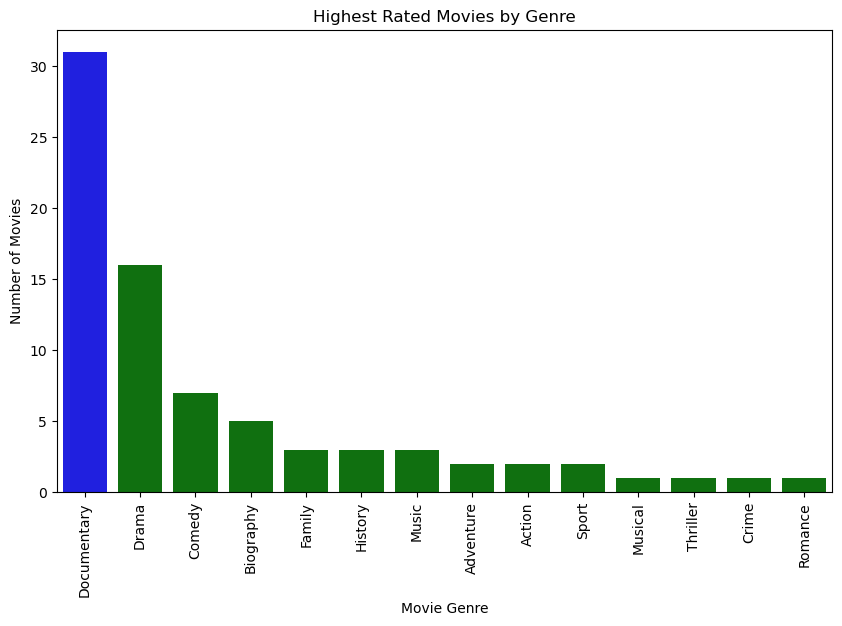

In [62]:
# Create the plot with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres_counts_df['Genre'], y=top_genres_counts_df[0], palette=['blue'] + ['green'] * (len(top_genres_counts_df) - 1))

# Customize the plot
plt.xticks(rotation=90)
plt.title('Highest Rated Movies by Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Number of Movies')

# Show the plot
plt.show()

We can also see if we can find the relationship between average rating and genre.
So we formulate an hypothesis.
1. Null Hypothesis (H0) - The mean ratings are the same across all genres.
2. Alternative Hypothesis (H1) - At least one genre has a different rating.

We then perform the ANOVA test because there are multiple genres and if ANOVA shows significant differences, we perform the post-hoc test to determine which specific genres differ from each other.

In [63]:
q3 = """  
        SELECT genres, averagerating
        FROM movie_basics
        JOIN movie_ratings
                USING (movie_id)
        WHERE numvotes > 49
        GROUP BY genres
        ORDER BY averagerating DESC
        LIMIT 50
     """

pd.read_sql(q3, con)

,genres,averagerating
0,Musical,9.3
1,"Adventure,Documentary,Western",9.2
2,"Documentary,Music,Sport",9.1
3,"Documentary,Music,War",8.9
4,Documentary,8.9
5,"Comedy,Music,Musical",8.9
6,"Adventure,Drama,War",8.9
7,"Drama,Family,Musical",8.7
8,"Biography,Documentary,News",8.7
9,"Action,Adventure,Documentary",8.7


In [78]:
top_genres2 = pd.read_sql(q3, con)

In [81]:
def separate_genres_and_assign_ratings(df):
    genre_ratings = {}
    
    for _, row in df.iterrows():
        genres = row['genres'].split(',')
        rating = row['averagerating']
        
        for genre in genres:
            if genre not in genre_ratings:
                genre_ratings[genre] = []
            genre_ratings[genre].append(rating)
    
    # Calculate the average rating for each genre
    genre_avg_ratings = {genre: np.mean(ratings) for genre, ratings in genre_ratings.items()}
    
    return genre_avg_ratings

# Call the function
genre_avg_ratings = separate_genres_and_assign_ratings(top_genres2)

# Convert to DataFrame for better visualization
genre_avg_ratings_df = pd.DataFrame(list(genre_avg_ratings.items()), columns=['Genre', 'AverageRating'])
genre_avg_ratings_df = genre_avg_ratings_df.sort_values(by='AverageRating', ascending=False)

# Display the DataFrame
print(genre_avg_ratings_df)

          Genre  AverageRating
4         Music       8.750000
3       Western       8.700000
9        Family       8.700000
6           War       8.516667
1     Adventure       8.488889
11         News       8.420000
0       Musical       8.388889
5         Sport       8.375000
2   Documentary       8.351724
10    Biography       8.320000
7        Comedy       8.230000
8         Drama       8.227273
12       Action       8.225000
13      Mystery       8.200000
15      History       8.200000
14     Thriller       8.188889
16        Crime       8.183333
20    Animation       8.116667
17      Romance       8.100000
19       Horror       8.100000
18      Fantasy       8.075000
21       Sci-Fi       7.900000


In [86]:
import statsmodels.formula.api as smf

def separate_genres_and_assign_ratings(df):
    genre_ratings = []
    
    for _, row in df.iterrows():
        genres = row['genres'].split(',')
        rating = row['averagerating']
        
        for genre in genres:
            genre_ratings.append({'Genre': genre, 'AverageRating': rating})
    
    return pd.DataFrame(genre_ratings)

# Convert the original DataFrame to a long-format DataFrame
long_genre_ratings_df = separate_genres_and_assign_ratings(top_genres2)

# Perform ANOVA
anova_result = smf.ols('AverageRating ~ Genre', data=long_genre_ratings_df).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)
print(anova_table)

# Check p-value to determine significance
p_value = anova_table['PR(>F)'][0]
print(f'p-value: {p_value:.4f}')

if p_value < 0.05:
    print("There are statistically significant differences in ratings across genres.")
else:
    print("There are no statistically significant differences in ratings across genres.")

             sum_sq     df         F    PR(>F)
Genre      3.326199   21.0  1.482397  0.095802
Residual  13.035399  122.0       NaN       NaN
p-value: 0.0958
There are no statistically significant differences in ratings across genres.


C:\Users\PHIL CONRAD\AppData\Local\Temp\ipykernel_21492\2046162744.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]


Because of the fact that the p-value is above 0.05, we fail to reject the null hypothesis and conclude that there are no statistical differences in ratings across genres. This means that it would be wise not to use average rating to determine which genre is best to use.

### Budget Recommendation

We need to find the best range in terms of budgeting while creating a film in order to increase the ROI.
Due to the volume of the data, we need to narrow it down to movies with a budget between 50 million and 250 million dollars.

In [64]:
movie_budget_fix = movie_budget_new.query('50000000 <= production_budget <= 250000000')
movie_budget_fix

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number,release_year
988,89,"Dec 15, 1978",Superman,55000000.0,134218018.0,300200000.0,165981982.0,Dec,12,1978
1048,49,"Jun 19, 1981",Superman II,54000000.0,108185706.0,108185706.0,0.0,Jun,6,1981
695,96,"Jun 22, 1988",Who Framed Roger Rabbit?,70000000.0,154112492.0,351500000.0,197387508.0,Jun,6,1988
958,59,"May 25, 1988",Rambo III,58000000.0,53715611.0,188715611.0,135000000.0,May,5,1988
722,23,"Aug 9, 1989",The Abyss,70000000.0,54243125.0,54243125.0,0.0,Aug,8,1989
...,...,...,...,...,...,...,...,...,...,...
124,25,"May 31, 2019",Godzilla: King of the Monsters,170000000.0,85576941.0,299276941.0,213700000.0,May,5,2019
619,20,"Jan 22, 2019",Renegades,77500000.0,0.0,1521672.0,1521672.0,Jan,1,2019
580,81,"Jun 7, 2019",The Secret Life of Pets 2,80000000.0,63795655.0,113351496.0,49555841.0,Jun,6,2019
1176,77,"Apr 12, 2019",Hellboy,50000000.0,21903748.0,40725492.0,18821744.0,Apr,4,2019


Mean Squared Error: 6636376695942085.00
R^2 Score: 0.30


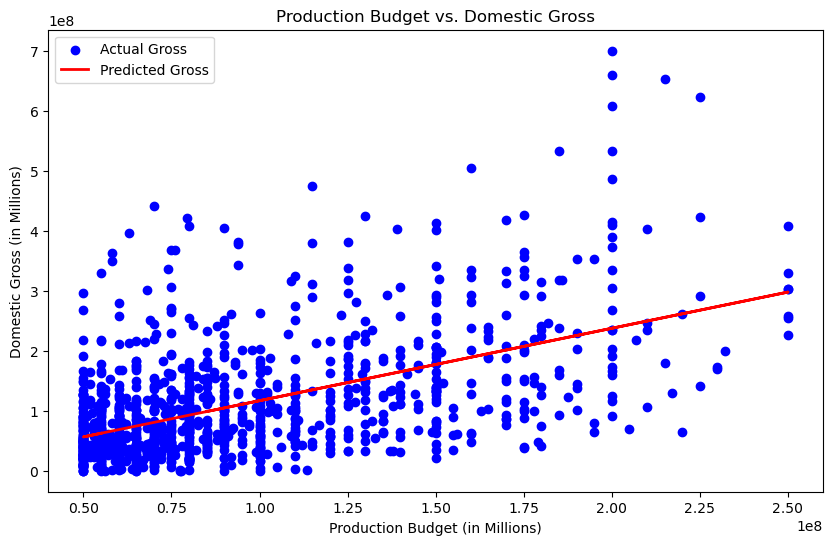

                            OLS Regression Results                            
Dep. Variable:         domestic_gross   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     501.0
Date:                Sun, 28 Jul 2024   Prob (F-statistic):           9.31e-93
Time:                        12:56:39   Log-Likelihood:                -23188.
No. Observations:                1181   AIC:                         4.638e+04
Df Residuals:                    1179   BIC:                         4.639e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.944e+06   5.54e+0

c:\Users\PHIL CONRAD\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = movie_budget_fix[['production_budget']]
y = movie_budget_fix['domestic_gross']

# Linear Regression with sklearn
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Gross')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted Gross')
plt.title('Production Budget vs. Domestic Gross')
plt.xlabel('Production Budget (in Millions)')
plt.ylabel('Domestic Gross (in Millions)')
plt.legend()
plt.show()

# Linear Regression with statsmodels for detailed summary
X_sm = sm.add_constant(X)  # Adding a constant term for the intercept
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

# Function to predict gross based on budget
def predict_gross(budget):
    return model.predict(np.array([[budget]]))[0]

# Example: Predict gross for a budget of $100 million
predicted_gross = predict_gross(100_000_000)
print(f"Predicted Domestic Gross for $100M budget: ${predicted_gross:.2f}")

The R-squared value of 0.298 indicates that approximately 29.8% of the variability in the domestic gross can be explained by the production budget. While this shows a moderate level of explanatory power, it suggests that other factors not included in the model also significantly affect the domestic gross.
The coefficient for *production_budget* is 1.2068. This implies that, on average, every additional dollar spent on the production budget is associated with an increase of approximately $1.21 in domestic gross. This positive relationship is statistically significant, with a t-value of 22.383 and a p-value of 0.000.
Using the regression model, the predicted domestic gross for a production budget of $100 million is approximately $116.74 million. This prediction is based on the relationship derived from the model and suggests a positive return on investment, assuming the model holds for this budget range

### Popularity of movies by month

In this visualization, we will use the tmdb data to plot the average popularity of movies per month.

c:\Users\PHIL CONRAD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


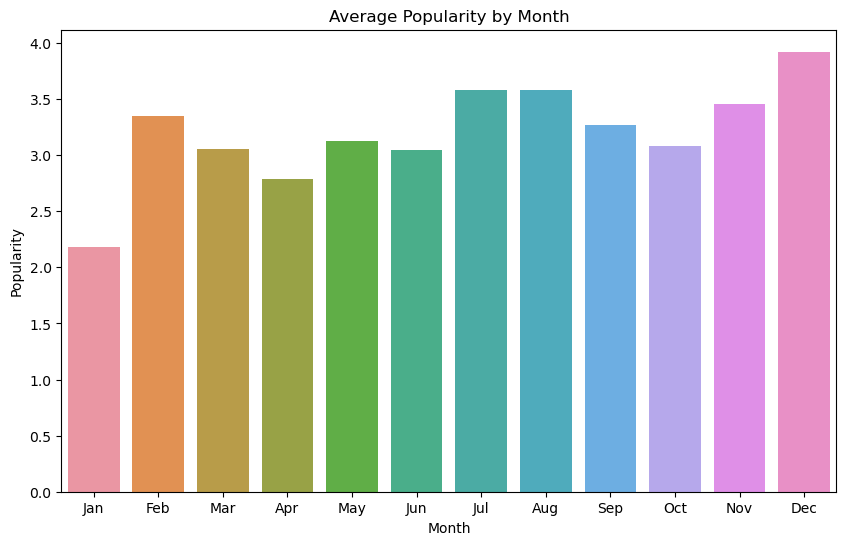

In [71]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create the plot with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=months, y=grouped_tmdb_movies['popularity'].mean())

# Set the title and axis labels
plt.title('Average Popularity by Month')
plt.xlabel('Month')
plt.ylabel('Popularity')

# Show the plot
plt.show()

It turns out that movies released on December have the highest average popularity score with June and July being identical and the 2nd highest. 

We can also plot the quantity of movies released during a specific month.

In [72]:
month_count_dict = {'Jan':0, 'Feb':0, 'Mar':0, 'Apr':0, 'May':0, 'Jun':0, 'Jul':0, 'Aug':0, 'Sep':0, 'Oct':0, 'Nov':0, 'Dec':0}

for month in movie_budget_new['release_month']:
    month_count_dict[month] += 1
month_count_dict

{'Jan': 328,
 'Feb': 370,
 'Mar': 440,
 'Apr': 433,
 'May': 393,
 'Jun': 459,
 'Jul': 424,
 'Aug': 473,
 'Sep': 466,
 'Oct': 542,
 'Nov': 466,
 'Dec': 621}

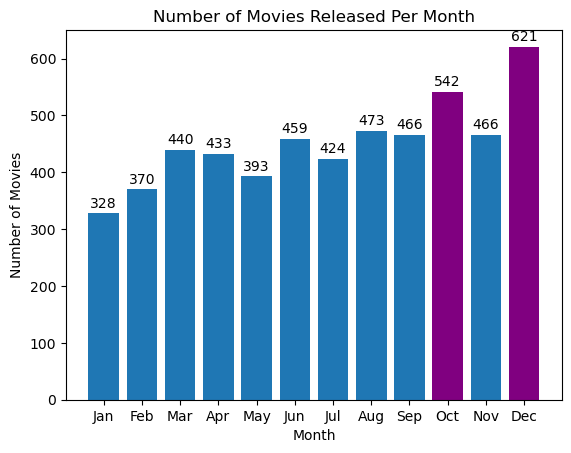

In [73]:
fig, ax = plt.subplots()

months_list = list(month_count_dict.keys())
values = list(month_count_dict.values())
colors = ['purple' if month in ['Oct', 'Dec'] else 'tab:blue' for month in months_list]

ax.bar(months_list, values, color=colors)
ax.set_title('Number of Movies Released Per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Movies')

ax.set_ylim([0, 650])

# Adding annotations
for month, value in zip(months_list, values):
    ax.annotate(f'{value}', (month, value + 10), ha='center')

plt.show()

Again, December stands out with the greatest number of movie releases.

Below we show both the mean foreign and domestic gross of movies per month.

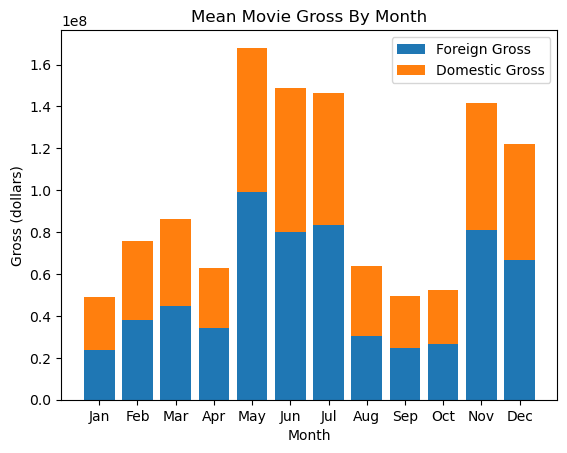

In [74]:
#plotting foreign and domestic growth by month as a stacked bar chart
months = list(month_count_dict.keys())

domestic_gross_mean = movie_budget_month['domestic_gross'].mean()
foreign_gross_mean = movie_budget_month['foreign_gross'].mean()

fig, ax = plt.subplots()

ax.bar(months, foreign_gross_mean, label='Foreign Gross')
ax.bar(months, domestic_gross_mean, bottom=foreign_gross_mean, label='Domestic Gross')

ax.set_title("Mean Movie Gross By Month")
ax.set_xlabel("Month")
ax.set_ylabel("Gross (dollars)")

ax.legend();

May saw the highest performance in movies, followed by June, July, and November. December, while trailing the top months, still performed notably better than the other months.

We can check the ROI based on specific months to determine which months would be considered best in order to get as much return on investments as possible.

In [75]:
roi_mean = movie_budget_20_grouped['ROI'].mean()
roi_mean

month_number
1     2.580592
2     2.257426
3     2.036785
4     2.289572
5     3.850234
6     2.694054
7     5.026171
8     2.460843
9     2.986020
10    2.688970
11    2.179851
12    1.846684
Name: ROI, dtype: float64

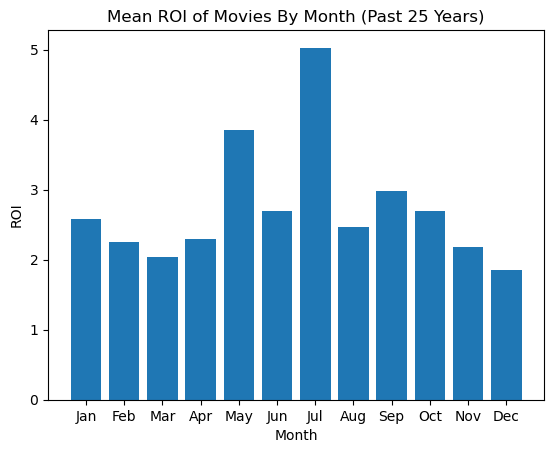

In [76]:
# Create the plot
fig, ax = plt.subplots()

ax.bar(months, roi_mean)

ax.set_title("Mean ROI of Movies By Month (Past 25 Years)")
ax.set_xlabel("Month")
ax.set_ylabel("ROI");


July stands out above the rest with a mean ROI of 5.02. The month with the second greatest mean ROI is May at 3.85.

After plotting the median ROI of movies against their release month, we saw how ROI is greatly affected by overperformers.

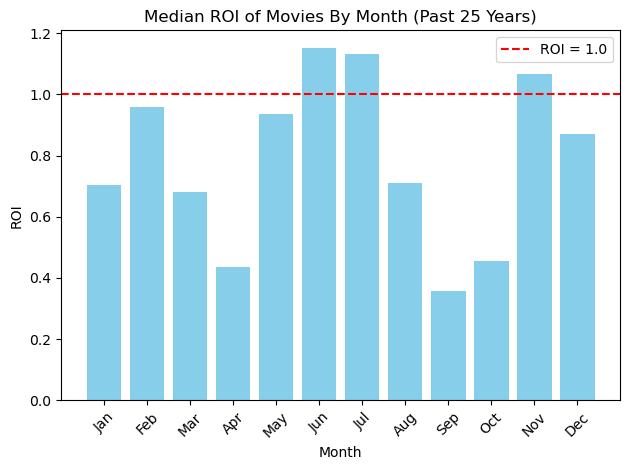

In [77]:
roi_median = movie_budget_20_grouped['ROI'].median()

fig, ax = plt.subplots()

# Plot the bar chart
ax.bar(months, roi_median, color='skyblue')

# Add a red line at ROI = 1.0
ax.axhline(y=1.0, color='red', linestyle='--', label='ROI = 1.0')

# Add labels and title
ax.set_title("Median ROI of Movies By Month (Past 25 Years)")
ax.set_xlabel("Month")
ax.set_ylabel("ROI")

# Add legend
ax.legend()

plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

The highest median ROI for movies by month was 1.18 (June), which is still lower than any mean ROI values. This discrepancy between means and medians indicates the variability in the movie market, where exceptional returns are possible but not typical. Only three months had median ROIs exceeding the break-even point of 1.0. The months with the best median ROIs align with those identified in our median gross analysis: June, July, November, and December.

Overall, our analysis of movies by release month shows that there are specific months where movies tend to achieve better financial performance.

## Conclusion

The three recommendations from this analysis for Urban Oscars Movie Studios are:

1. The most popular genre of film is Documentary: It has the most top-rated movies, so it would be a good and safe choice to prioritize documentary movies.

2. Using a budget of over $100 million: The more one invests in a film, the more one gains from it through an increased gross. This then shows a greater ROI. It would be wise for the company to invest more in the budget to gain domestically and worldwide.

3. Releasing films in June, July, November and December. Urban Oscars should release films in the said months to optimize movie profits and ROI.